In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, StratifiedKFold, GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import scipy.stats as stats
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import recall_score, f1_score, confusion_matrix, classification_report, accuracy_score,precision_score, roc_auc_score

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df = pd.read_excel("cleaned_1.xlsx")

In [3]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,cleaned_text,Sentiment,high_retweet,sentiments_encoded,retweets_scaled,cluster
0,#NFTCollection The Art of No Limits\n\n#Artist...,False,3,NaN,2023-07-17 13:48:56,True,NaN,1680937631226396928,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",The__Renewables,0,False,False,NaN,NaN,nftcollection art limits artist gordon bergman...,Neutral,0,1,0.000000,0
1,RT @degame_l2y: 🎉 Join the #NFT Gaming Summer ...,False,0,NaN,2023-07-17 13:43:31,False,NaN,1680936271185850112,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hafiztausib,177,True,False,NaN,NaN,rt degame_l2y join nft gaming summer event br...,Positive,1,2,0.180061,1
2,RT @V_TBot: Apple Reportedly Departs from Trad...,False,0,NaN,2023-07-17 13:30:34,False,NaN,1680933010156450048,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",entrepreneur_cm,1,True,False,NaN,NaN,rt v_tbot apple reportedly departs tradition c...,Neutral,0,1,0.001017,0
3,Apple Reportedly Departs from Tradition with C...,False,0,NaN,2023-07-17 13:30:03,True,NaN,1680932881915579904,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",V_TBot,1,False,False,NaN,NaN,apple reportedly departs tradition creation de...,Neutral,0,1,0.001017,0
4,Downsizing Disney looks to unload its TV asset...,False,0,NaN,2023-07-17 13:15:32,True,NaN,1680929225950281984,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",MacDailyNews,0,False,False,NaN,NaN,looks tv apple may disney,Neutral,0,1,0.000000,0


In [4]:
df.shape

(1470, 22)

In [5]:
df.isna().sum()

text                     0
favorited                0
favoriteCount            0
replyToSN             1407
created                  0
truncated                0
replyToSID            1407
id                       0
replyToUID            1407
statusSource             0
screenName               0
retweetCount             0
isRetweet                0
retweeted                0
longitude             1469
latitude              1469
cleaned_text             1
Sentiment                0
high_retweet             0
sentiments_encoded       0
retweets_scaled          0
cluster                  0
dtype: int64

In [6]:
df.columns

Index(['text', 'favorited', 'favoriteCount', 'replyToSN', 'created',
       'truncated', 'replyToSID', 'id', 'replyToUID', 'statusSource',
       'screenName', 'retweetCount', 'isRetweet', 'retweeted', 'longitude',
       'latitude', 'cleaned_text', 'Sentiment', 'high_retweet',
       'sentiments_encoded', 'retweets_scaled', 'cluster'],
      dtype='object')

In [7]:
numerical_df = df[['favoriteCount','retweetCount']].select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()
print(correlation_matrix)

               favoriteCount  retweetCount
favoriteCount       1.000000     -0.019964
retweetCount       -0.019964      1.000000


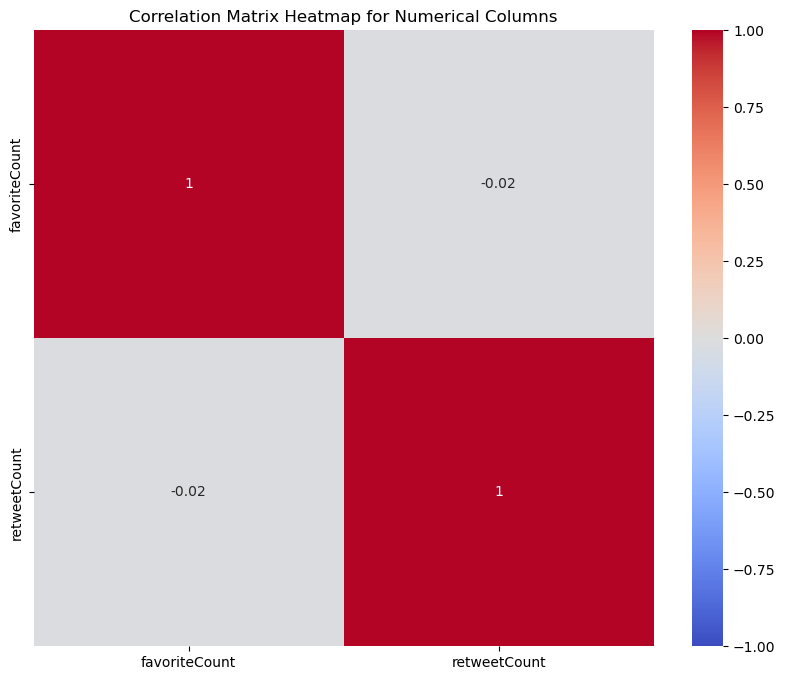

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for Numerical Columns')
plt.show()

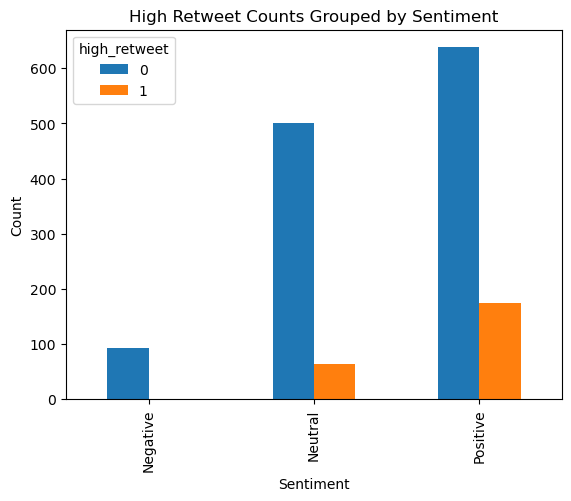

In [9]:
# Group by 'Sentiment' and get the value counts for 'high_retweet'
grouped_counts = df.groupby('Sentiment')['high_retweet'].value_counts().unstack()

# Plot
grouped_counts.plot(kind='bar', stacked=False)

plt.title('High Retweet Counts Grouped by Sentiment')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

In [10]:
df['created'] = pd.to_datetime(df['created'])

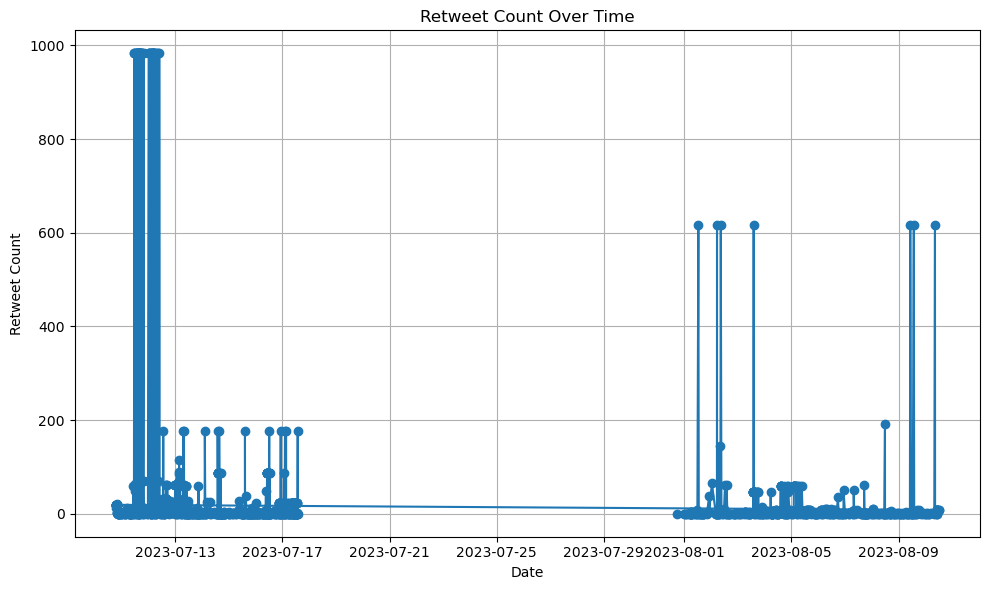

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['created'], df['retweetCount'], marker='o')
plt.title('Retweet Count Over Time')
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.grid(True)
plt.tight_layout()
plt.show()


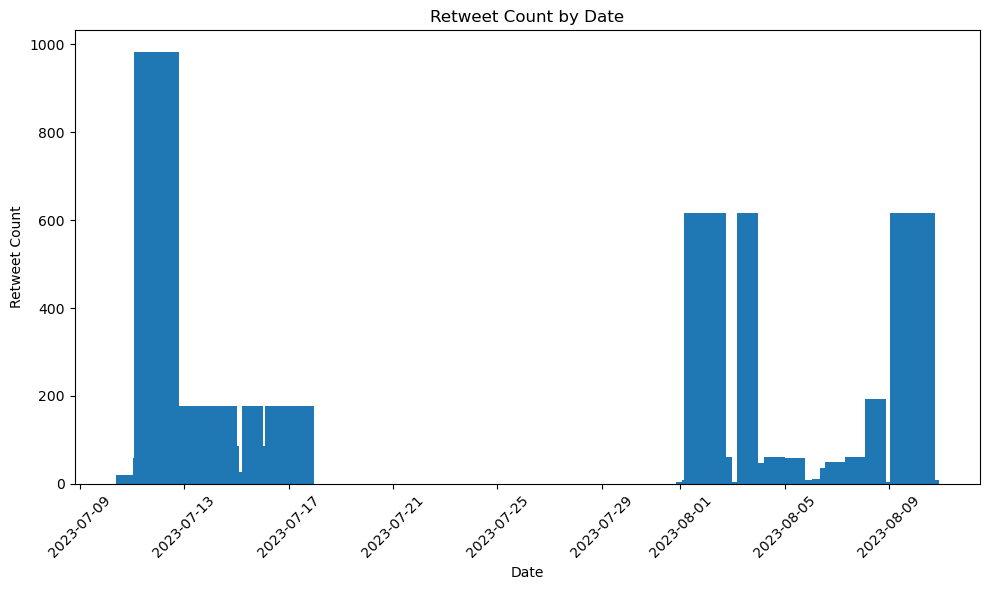

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(df['created'], df['retweetCount'])
plt.title('Retweet Count by Date')
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


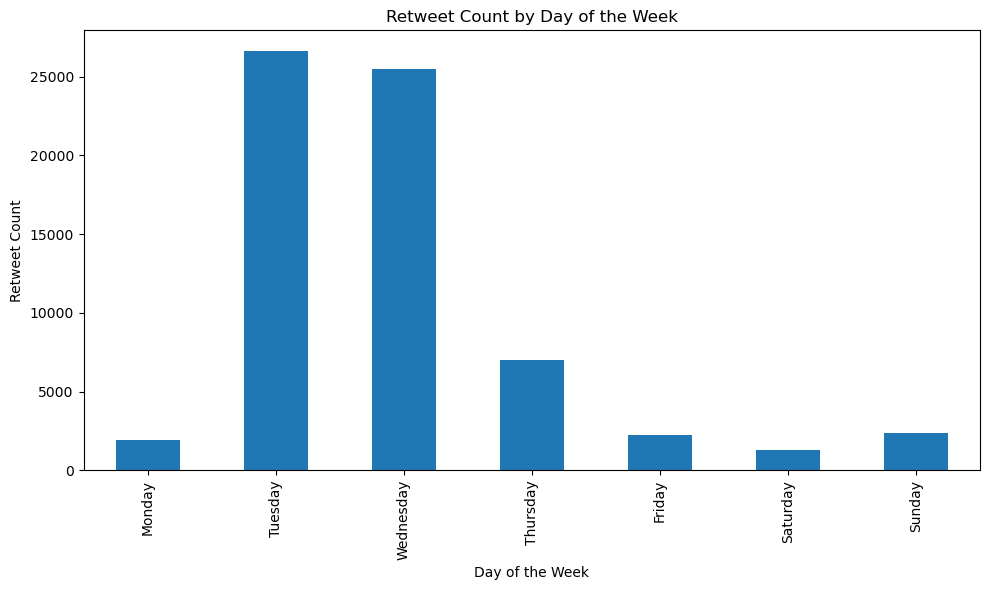

In [13]:
df['day_of_week'] = df['created'].dt.day_name()
grouped_data = df.groupby('day_of_week')['retweetCount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Retweet Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Retweet Count')
plt.tight_layout()
plt.show()



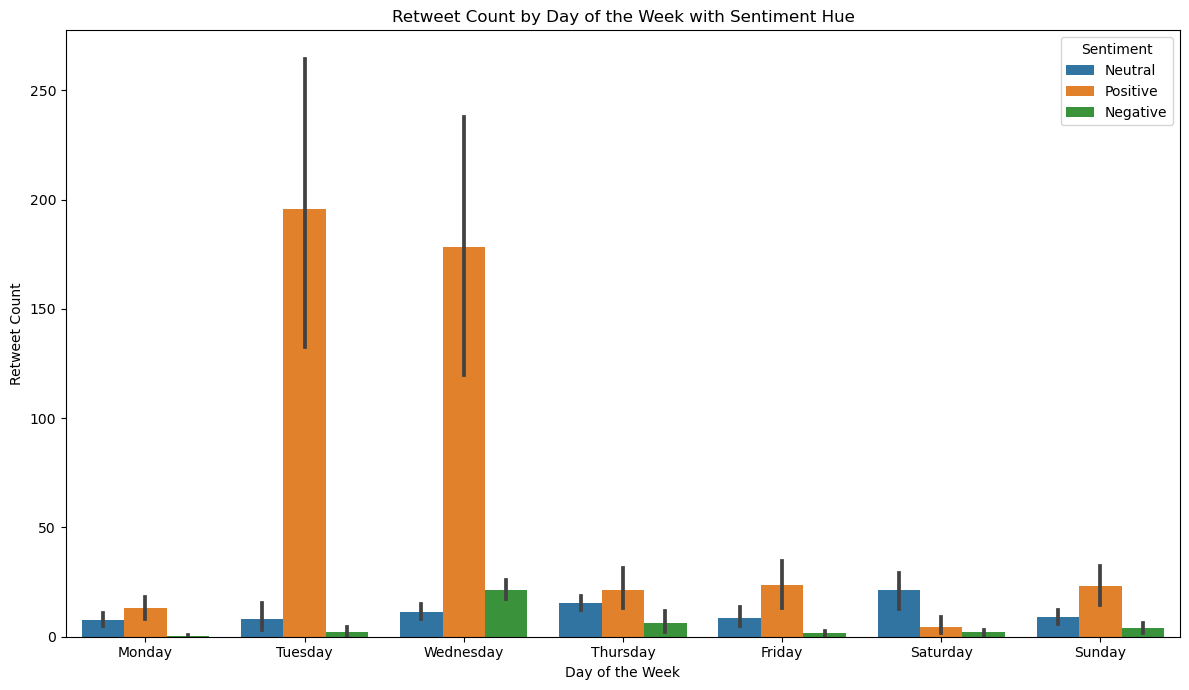

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='day_of_week', y='retweetCount', hue='Sentiment', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Retweet Count by Day of the Week with Sentiment Hue')
plt.xlabel('Day of the Week')
plt.ylabel('Retweet Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


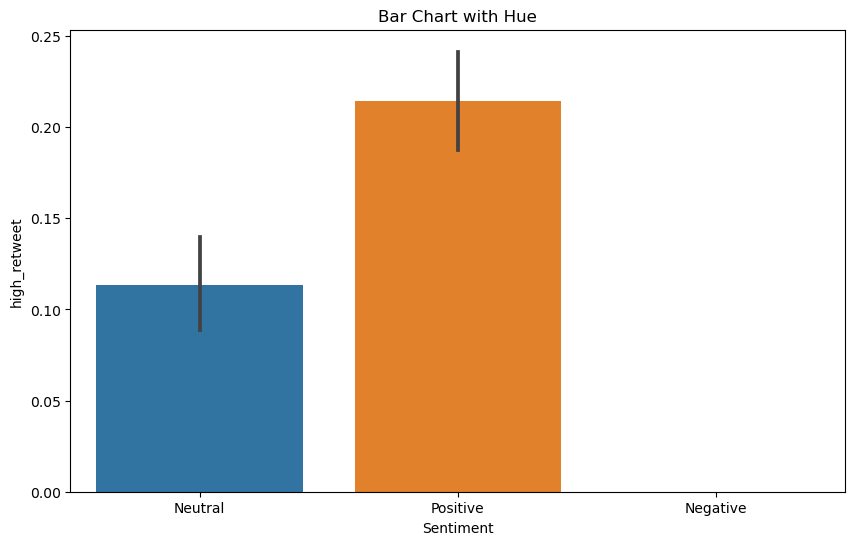

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sentiment', y='high_retweet')
plt.title('Bar Chart with Hue')
plt.show()

In [16]:
df1=df[['cleaned_text','high_retweet']].copy()

In [17]:
df1.dropna(inplace=True)

In [18]:
df1.shape

(1469, 2)

In [19]:
X = df1['cleaned_text']
y = df1['high_retweet']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1175,), (294,), (1175,), (294,))

In [20]:
X_train.head()

655     rt im_beit try 3 months 5days 4minutes  apple ...
1030                   applewatch applevisionpro original
255     rt vinfastar hello world breaking news product...
1350    rt elyssaar giving old cat whole new look ment...
1282    rt slogo trying new applevisionpro  httpstcoqh...
Name: cleaned_text, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Now, X_tfidf is a matrix representing the text data in vectorized form
print(X_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_train, test_size=0.2)

# Training the classifier
clf = LogisticRegression().fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)


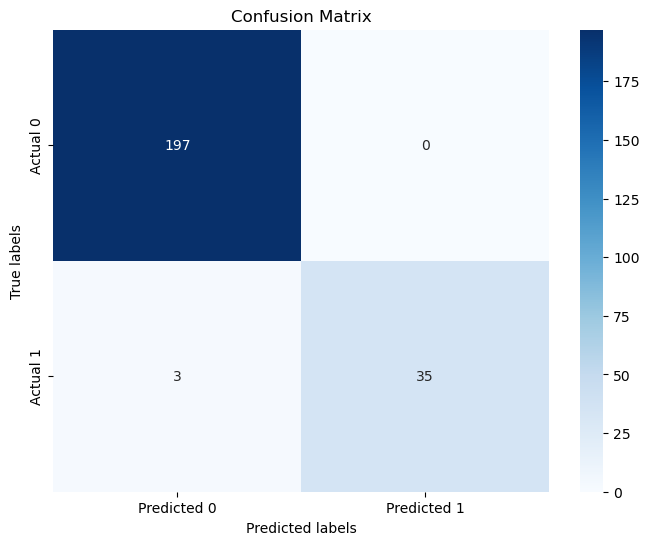

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [24]:
print("Train Accuracy Score:", accuracy_score(y_test, y_pred))

Train Accuracy Score: 0.9872340425531915


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:, 1]
y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 1.0
Train Confusion Matrix:
 [[782   0]
 [  0 158]] 

Train F1 Score: 1.0
Train Precision Score: 1.0
Train Recall Score: 1.0
Train ROC_AUC Score: 1.0

Test Accuracy Score: 0.9914893617021276
Test Confusion Matrix:
 [[197   0]
 [  2  36]] 

Test F1 Score: 0.972972972972973
Test Precision Score: 1.0
Test Recall Score: 0.9473684210526315
Test ROC_AUC Score: 0.9936548223350254


In [26]:
models = []

models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('RF', RandomForestClassifier(random_state = 0, n_jobs = -1)))
models.append(('ADA',AdaBoostClassifier(random_state = 0)))
models.append(('XGB', XGBClassifier(random_state = 0, n_jobs = -1)))


## Validation Set Scores
precision = []
recall = []
names = []
f1 = []
accuracy = []
roc_auc = []
Training_Time=[]
Prediction_Time=[]

for name, model in models:
    start_time = time.time()    
    model.fit(X_train, y_train)
    end_time = time.time()
    Training_Time.append(end_time - start_time)
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    Prediction_Time.append(end_time-start_time)
    
    y_proba = model.predict_proba(X_test)[:, 1]
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_proba))
    names.append(name)
models_df = pd.DataFrame({'Model' : names, 'Precision' : precision, 'Recall' : recall,
                          'F1' : f1, 'Accuracy' : accuracy, 'ROC_AUC' : roc_auc,
                          'Training_Time':Training_Time,'Prediction_Time':Prediction_Time})
models_df

,Model,Precision,Recall,F1,Accuracy,ROC_AUC,Training_Time,Prediction_Time
0,DT,0.947368,0.947368,0.947368,0.982979,0.968608,0.005143,0.000128
1,RF,1.000000,0.947368,0.972973,0.991489,0.993655,0.106368,0.011920
2,ADA,0.972973,0.947368,0.960000,0.987234,0.980297,0.070584,0.004319
3,XGB,0.923077,0.947368,0.935065,0.978723,0.994323,0.113930,0.001741


In [27]:
# param_distributions
rs_grid = {'n_estimators': [100, 300, 500, 800, 1000, 1200, 1400],
           'criterion': ['gini', 'entropy'],
           'max_features': ['auto', 'log2'],
           'max_depth': [3, 5, 7, 9, 15, 25, 30],
           'min_samples_split': [2, 3, 4, 5, 7, 10, 15],
           'min_samples_leaf': [1, 2, 5, 10, 12, 14]}

# instantiate RF model class for tuning
rf = RandomForestClassifier(random_state=0)

# randomized search of parameters using 5 fold cross validation, 
rf_rsearch = RandomizedSearchCV(estimator=rf, 
                               param_distributions=rs_grid, 
                               n_iter=200, 
                               cv=5, 
                               verbose=3, 
                               random_state=0, 
                               n_jobs=-1)

# fit model with optimized hyperparameters
rf_rsearch.fit(X_train, y_train)

# define our optimal random forest model
best_rfrs = rf_rsearch.best_estimator_

# create model dict variable for output_model_stats function
model = {"rf_randomized_search": best_rfrs}

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [28]:
model=best_rfrs

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print("Training Time:", end_time - start_time)
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1]
start_time = time.time()
y_test_pred = model.predict(X_test)
end_time = time.time()
print("Prediction Time:", end_time - start_time)
y_test_prob = model.predict_proba(X_test)[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Training Time: 0.10807013511657715
Prediction Time: 0.0038909912109375
Train Accuracy Score: 0.9989361702127659
Train Confusion Matrix:
 [[782   0]
 [  1 157]] 

Train F1 Score: 0.9968253968253968
Train Precision Score: 1.0
Train Recall Score: 0.9936708860759493
Train ROC_AUC Score: 0.9999999999999999

Test Accuracy Score: 0.9914893617021276
Test Confusion Matrix:
 [[197   0]
 [  2  36]] 

Test F1 Score: 0.972972972972973
Test Precision Score: 1.0
Test Recall Score: 0.9473684210526315
Test ROC_AUC Score: 0.9907827945498263


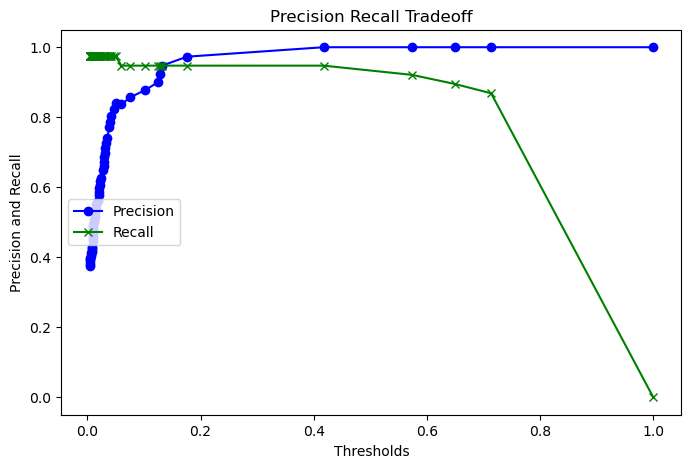

In [29]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize = (8, 5))
prec, rec, thresh = precision_recall_curve(y_test, y_test_prob)
plt.plot(thresh, prec[1:], marker = 'o', c = 'b', label = 'Precision')
plt.plot(thresh, rec[1:], marker = 'x', c = 'g', label = 'Recall')
plt.legend(loc = 'center left')
plt.xlabel("Thresholds")
plt.ylabel('Precision and Recall')
plt.title('Precision Recall Tradeoff')
plt.show()



In [30]:
acc = []
f1 = []
prec = []
rec = []
thresh = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
for i in thresh:
    pred = (y_test_prob >= i).astype(bool)
    f1.append(f1_score(y_test, pred))
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))
res = pd.DataFrame({"Thresholds" : thresh, "Accuracy" : acc, "F1" : f1, "Precision" : prec, "Recall" : rec})
res

,Thresholds,Accuracy,F1,Precision,Recall
0,0.10,0.965957,0.900000,0.857143,0.947368
1,0.15,0.982979,0.947368,0.947368,0.947368
2,0.20,0.987234,0.960000,0.972973,0.947368
3,0.25,0.987234,0.960000,0.972973,0.947368
4,0.30,0.987234,0.960000,0.972973,0.947368
5,0.35,0.987234,0.960000,0.972973,0.947368
6,0.40,0.987234,0.960000,0.972973,0.947368
7,0.45,0.991489,0.972973,1.000000,0.947368
8,0.50,0.991489,0.972973,1.000000,0.947368
9,0.55,0.991489,0.972973,1.000000,0.947368


Best Threshold=0.573591, G-Mean=0.973


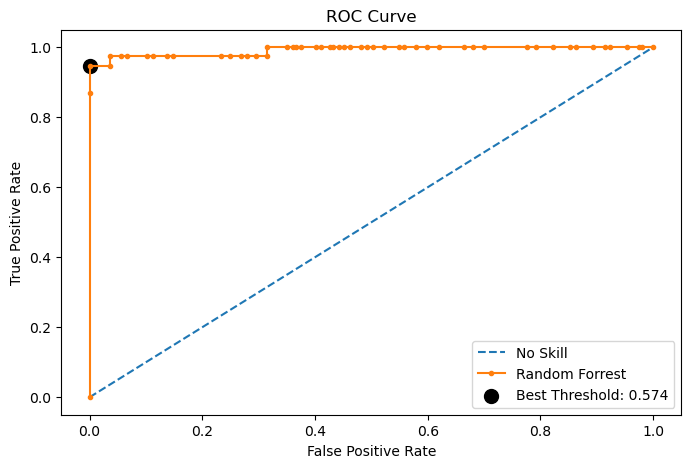

In [31]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (8, 5))
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forrest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', alpha = 1, edgecolors = 'k', s = 100,
            label='Best Threshold: '+str(round(thresholds[ix], 3)))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend(loc = 'best')
# show the plot
plt.show()

In [32]:
fpr,tpr

(array([0.        , 0.        , 0.        , 0.03553299, 0.03553299,
        0.05583756, 0.06598985, 0.10152284, 0.11167513, 0.13705584,
        0.14720812, 0.23350254, 0.24873096, 0.26903553, 0.27918782,
        0.29441624, 0.31472081, 0.31472081, 0.35025381, 0.36040609,
        0.36548223, 0.37563452, 0.40101523, 0.41116751, 0.42639594,
        0.43147208, 0.44162437, 0.45177665, 0.46192893, 0.4822335 ,
        0.49238579, 0.50253807, 0.52284264, 0.54822335, 0.55837563,
        0.5786802 , 0.59898477, 0.61928934, 0.66497462, 0.68020305,
        0.70050761, 0.77664975, 0.79187817, 0.82233503, 0.85279188,
        0.86294416, 0.89340102, 0.91370558, 0.92385787, 0.95431472,
        0.97461929, 0.97969543, 1.        ]),
 array([0.        , 0.86842105, 0.94736842, 0.94736842, 0.97368421,
        0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
        0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
        0.97368421, 0.97368421, 1.        , 1.        , 1.        ,
  

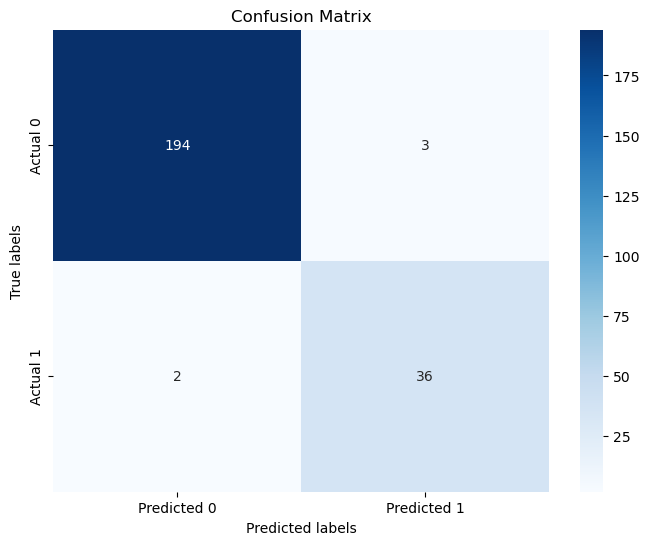

In [33]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:
#models_df.to_excel('Models_Evaluation.xlsx')

[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=0.878 total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=3, n_estimators=1400;, score=0.830 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.957 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=1000;, score=0.830 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1000;, score=0.995 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500;, score=0.904 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=15, max_features=auto, mi

[CV 3/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=3, n_estimators=1400;, score=0.830 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.973 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.920 total time=   1.2s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=100;, score=0.835 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.973 total time=   1.4s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=14, min_samples_split=3, n_estimators=100;, score=0.835 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_sampl

[CV 1/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=3, n_estimators=1400;, score=0.835 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=7, n_estimators=800;, score=0.835 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.941 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=1000;, score=0.830 total time=   1.1s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1000;, score=0.968 total time=   1.6s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=0.904 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=0.888 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=3, n_estimators=1400;, score=0.830 total time=   1.7s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=7, n_estimators=800;, score=0.830 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=1000;, score=0.830 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=100;, score=0.830 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=1.000 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samp